In [1]:
using LinearAlgebra, Kronecker, Random, BlockDiagonals, PyPlot

In [2]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)
vec(X) = vcat(X...)

vec (generic function with 1 method)

In [3]:
n = 4 # number of dims
i = 0.25 # kgm^2, 
b = 0.2 # kgm^2/s
ta = 0.03 # s
te = 0.04 # s
L0 = 0.35 # m

bu = 1 / (ta * te * i)
α1 = bu * b
α2 = 1/(ta * te) + (1/ta + 1/te) * b/i
α3 = b/i + 1/ta + 1/te

A = [zeros(3) eye(3); -[0, α1, α2, α3]']
B = [zeros(3); bu]
C = [eye(3) zeros(3)]
D = Diagonal([1e-3, 1e-2, 5e-2])

Y = 0.02 * B
G = 0.03 * eye(n)

Q = Diagonal([1.0, 0.01, 0, 0]) 
R = 0.0001
U = Diagonal([1.0, 0.1, 0.01, 0]);

In [4]:
maxiter = 1000
eps = 1e-8

# initialize
L = rand(n)' # Feedback gains
K = rand(n, 3) # Kalman gains
I2n = eye(2n)

8×8 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   1.0

In [5]:
Ā = [A-B*L B*L; zeros(size(A)) (A-K*C)]
Ȳ = [-ones(2) ones(2)] ⊗ (Y*L) 
Ḡ = [G zeros(size(K)); G (-K*D)]
V = BlockDiagonal([Q, U]) + [1 -1; -1 1] ⊗ (L'* R * L)

8×8 Matrix{Float64}:
  1.00003      3.27724e-5   3.26191e-5  …  -3.26191e-5  -4.09581e-5
  3.27724e-5   0.0100394    3.92154e-5     -3.92154e-5  -4.92407e-5
  3.26191e-5   3.92154e-5   3.9032e-5      -3.9032e-5   -4.90103e-5
  4.09581e-5   4.92407e-5   4.90103e-5     -4.90103e-5  -6.15397e-5
 -2.72599e-5  -3.27724e-5  -3.26191e-5      3.26191e-5   4.09581e-5
 -3.27724e-5  -3.93997e-5  -3.92154e-5  …   3.92154e-5   4.92407e-5
 -3.26191e-5  -3.92154e-5  -3.9032e-5       0.010039     4.90103e-5
 -4.09581e-5  -4.92407e-5  -4.90103e-5      4.90103e-5   6.15397e-5

In [6]:
# update S, P
S = (I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')^-1

64×64 Matrix{Float64}:
 -2.04097       0.5           0.733533     …  -0.00110545    -2.11135
 -1.97851      -1.2471        1.66259         -0.00136036    -2.59822
 -0.768665     -1.12588       0.000249651     -3.20687e-6    -0.00612496
 -0.000289001  -0.000421042   1.06189e-6      -1.53533e-6    -0.00293241
 -0.466196     -1.45104      -0.286664         0.000621721    1.18746
  0.925547     -0.262672     -0.82458      …   0.00142701     2.72552
  0.642834      1.02118       0.0290884       -6.37564e-5    -0.121771
 -0.0018088    -0.00135769    0.000478135      4.27869e-7     0.000817207
 -1.97851       1.2471        0.662586        -0.00136036    -2.59822
 -3.14237       3.68217e-15   2.29807         -0.00299998    -5.72981
 -1.91834      -1.01618       1.12741      …  -0.00163249    -3.11797
 -0.000718675  -0.000380175   0.000422352     -1.89287e-6    -0.00361527
 -2.03109      -1.83343       0.998134        -0.00122989    -2.34903
  ⋮                                        ⋱         

In [7]:
S = (I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')

64×64 Matrix{Float64}:
 0.0  0.0  0.0  -1740.37   0.0       …     0.0          0.0        1211.55
 1.0  0.0  0.0  -2758.97   0.0             0.0          0.0        1456.55
 0.0  1.0  0.0  -2962.52   0.0             0.0          0.0        1449.74
 0.0  0.0  1.0  -2674.04   0.0             0.0          0.0        1820.36
 0.0  0.0  0.0   1740.37  -0.664866        0.0          0.0       -1211.55
 0.0  0.0  0.0   2092.31   0.588885  …     0.0          0.0       -1456.55
 0.0  0.0  0.0   2082.52  -0.191638        0.0          0.0       -1449.74
 0.0  0.0  0.0   2614.91   0.0             0.0          0.0       -1820.36
 1.0  0.0  0.0      0.0    0.0             0.0          0.0        1456.55
 0.0  1.0  0.0      0.0    0.0             0.0          0.0        1751.1
 0.0  0.0  1.0      0.0    0.0       …     0.0          0.0        1742.91
 0.0  0.0  0.0      1.0    0.0             0.0          0.0        2188.47
 0.0  0.0  0.0      0.0    1.0             0.0          0.0       -1456.55
 ⋮ 

In [8]:
# update S, P
S = (I2n' ⊗ Ā')^-1

64×64 Kronecker.KroneckerProduct{Float64, Diagonal{Float64, Vector{Float64}}, Adjoint{Float64, Matrix{Float64}}}:
 -1.58528       1.0   0.0   0.0   0.0         …   0.0           0.0
 -1.70224       0.0   1.0   0.0   0.0             0.0           0.0
 -1.53648      -0.0  -0.0   1.0   0.0             0.0           0.0
 -0.000574591   0.0   0.0   0.0   0.0             0.0           0.0
 -1.34986       0.0   0.0   0.0  -0.663962       -0.0          -0.0
 -1.2825        0.0   0.0   0.0  -0.647788    …   0.0          -0.0
  1.37145      -0.0  -0.0  -0.0  -0.00310227     -0.0           0.0
 -0.00221615    0.0   0.0   0.0  -5.24623e-5     -0.0          -0.0
 -0.0           0.0   0.0   0.0   0.0             0.0           0.0
 -0.0           0.0   0.0   0.0   0.0             0.0           0.0
 -0.0          -0.0  -0.0   0.0   0.0         …   0.0           0.0
 -0.0           0.0   0.0   0.0   0.0             0.0           0.0
 -0.0           0.0   0.0   0.0  -0.0            -0.0          -0.0
  

In [9]:
P = reshape((I2n' ⊗ Ā +  Ā ⊗ I2n + Ȳ ⊗  Ȳ)^-1 * vec(-Ḡ * Ḡ'), (2n, 2n))

8×8 Matrix{Float64}:
  0.0117891    -0.00045      -0.00576369   …   0.000612278   0.000923679
 -0.00045       0.00576369   -0.00045         -8.46893e-5   -0.000148984
 -0.00576369   -0.00045       0.00504358       0.00037664    0.000940498
  0.00045      -0.00504358   -0.00045         -0.00162527    0.0460524
  0.000908406   0.000345449   0.000139135     -0.000251618   0.000903024
 -0.000890063   0.000126191  -0.000511215  …  -0.000832491  -0.00181914
  0.000612278  -8.46893e-5    0.00037664       0.000734339  -0.000686218
  0.000923679  -0.000148984   0.000940498     -0.000686218   0.0495933

In [10]:
# update K, L
P22 = P[n+1:2n, n+1:2n]
S11 = S[1:n, 1:n]
S22 = S[n+1:2n, n+1:2n]

4×4 Matrix{Float64}:
 -0.663962     0.772121     -0.541977     -0.642677
 -0.647788    -0.580884      0.462425     -0.325923
 -0.00310227  -0.0198228    -0.0501506     0.970646
 -5.24623e-5  -0.000335222  -0.000848094  -0.000496402

In [11]:
Ktm1 = copy(K)
Ltm1 = copy(L)

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.52211  0.627692  0.624756  0.784472

In [12]:
K = P22 * C' * (D * D')^-1
L = (R + Y' * (S11 + S22) * Y)^-1 * B' * S11

1×4 adjoint(::Vector{Float64}) with eltype Float64:
 0.868173  0.0  0.0  0.0

In [13]:
for i in 1:maxiter
    Ā = [A-B*L B*L; zeros(size(A)) (A-K*C)]
    Ȳ = [-ones(2) ones(2)] ⊗ (Y*L) 
    Ḡ = [G zeros(size(K)); G (-K*D)]
    V = BlockDiagonal([Q, U]) + [1 -1; -1 1] ⊗ (L'* R * L)
    
    # update S, P
    S = -reshape((I2n' ⊗ Ā' +  Ā' ⊗ I2n + Ȳ' ⊗  Ȳ')^-1 * vec(V), (2n, 2n))
    P = -reshape((I2n' ⊗ Ā +  Ā ⊗ I2n + Ȳ ⊗  Ȳ)^-1 * vec(Ḡ * Ḡ'), (2n, 2n))

    # update K, L
    P22 = P[n+1:2n, n+1:2n]
    S11 = S[1:n, 1:n]
    S22 = S[n+1:2n, n+1:2n]

    Ktm1 = copy(K)
    Ltm1 = copy(L)

    K = P22 * C' * (D * D')^-1
    L = (R + Y' * (S11 + S22) * Y)^-1 * B' * S11
    if sum(abs.(K - Ktm1)) < eps && sum(abs.(L - Ltm1)) < eps
        break
    end
end

In [14]:
dt = 0.001 # sec
T = 2.0 # sec
nt = round(Int, T/dt)
Xa = zeros(4, nt)
ua = zeros(nt)
Xa[1, 1] = -0.5 # m; initial position (target position is zero)

for k=1:nt-1
    ua[k] = -L * Xa[:, k]
    Xa[:, k+1] = Xa[:,k] + (A * Xa[:,k] + B * ua[k]) * dt
end

In [15]:
sqrtdt = √dt
nsim = 10
XSimAll = zeros(nsim, 4, nt)
uSimAll = zeros(nsim, nt)
for i in 1:nsim
    XSim = zeros(4, nt)
    Xhat = zeros(4, nt)
    u = zeros(nt)
    XSim[1, 1] = -0.5 # m; initial position (target position is zero)
    Xhat[1, 1] = XSim[1, 1]
    
    for k=1:nt-1
        u[k] = -L * Xhat[:, k]
        XSim[:, k+1] = XSim[:,k] + (A * XSim[:,k] + B * u[k]) * dt + sqrtdt * (Y * u[k] * randn() + G * randn(n))
        dy = C * XSim[:,k] * dt + D * sqrtdt * randn(n-1)
        Xhat[:, k+1] = Xhat[:,k] + (A * Xhat[:,k] + B * u[k]) * dt + K * (dy - C * Xhat[:,k] * dt)
    end
    XSimAll[i,:,:] = XSim
    uSimAll[i, :] = u
end

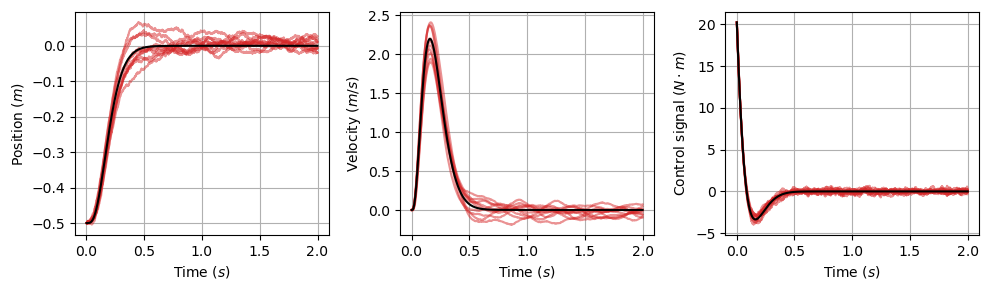

In [16]:
tarray = (1:nt) * dt
label = [L"Position ($m$)", L"Velocity ($m/s$)", L"Acceleration ($m/s^2$)", L"Jerk ($m/s^3$)"]
figure(figsize=(10, 3))
for i in 1:2
    subplot(1,3,i)
    plot(tarray, XSimAll[:,i,:]', "tab:red", alpha=0.5)
    plot(tarray, Xa[i,:], "k")
    ylabel(label[i]); grid()
    xlabel(L"Time ($s$)")
end
subplot(1,3,3)
plot(tarray, uSimAll', "tab:red", alpha=0.5)
plot(tarray, ua, "k")
ylabel(L"Control signal ($N\cdot m$)"); grid()
xlabel(L"Time ($s$)")
tight_layout()